In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# import os
# change directory for your path
# os.chdir('E:\\OneDrive\\Documents\\GitHub\\eHealthEquity\\Research\\Data Source')

In [82]:
df = pd.read_csv('acs5y_2021_brfss_2021_merged.csv')

#choose columns for analysis
index_list = [
    'state','county'
]
brfss_list = [col for col in df.columns if col.startswith('brfss_')]
acs_list = [col for col in df.columns if col.startswith('pct_')]

all_columns = index_list + brfss_list + acs_list

In [83]:
df = df[all_columns]

In [86]:
df.head()

,state,county,brfss_access2_ageadjprv,brfss_access2_crdprv,brfss_checkup_ageadjprv,brfss_checkup_crdprv,brfss_csmoking_ageadjprv,brfss_csmoking_crdprv,brfss_depression_ageadjprv,brfss_depression_crdprv,brfss_diabetes_ageadjprv,brfss_diabetes_crdprv,brfss_ghlth_ageadjprv,brfss_ghlth_crdprv,brfss_mhlth_ageadjprv,brfss_mhlth_crdprv,brfss_obesity_ageadjprv,brfss_obesity_crdprv,brfss_access2_ageadjprv_lower,brfss_access2_ageadjprv_upper,brfss_access2_crdprv_lower,brfss_access2_crdprv_upper,brfss_checkup_ageadjprv_lower,brfss_checkup_ageadjprv_upper,brfss_checkup_crdprv_lower,brfss_checkup_crdprv_upper,brfss_csmoking_ageadjprv_lower,brfss_csmoking_ageadjprv_upper,brfss_csmoking_crdprv_lower,brfss_csmoking_crdprv_upper,brfss_depression_ageadjprv_lower,brfss_depression_ageadjprv_upper,brfss_depression_crdprv_lower,brfss_depression_crdprv_upper,brfss_diabetes_ageadjprv_lower,brfss_diabetes_ageadjprv_upper,brfss_diabetes_crdprv_lower,brfss_diabetes_crdprv_upper,brfss_ghlth_ageadjprv_lower,brfss_ghlth_ageadjprv_upper,brfss_ghlth_crdprv_lower,brfss_ghlth_crdprv_upper,brfss_mhlth_ageadjprv_lower,brfss_mhlth_ageadjprv_upper,brfss_mhlth_crdprv_lower,brfss_mhlth_crdprv_upper,brfss_obesity_ageadjprv_lower,brfss_obesity_ageadjprv_upper,brfss_obesity_crdprv_lower,brfss_obesity_crdprv_upper,pct_ses_pov,pct_age_gte65_lower,pct_age_gte65,pct_age_gte65_upper,pct_race_white_lower,pct_race_white,pct_race_white_upper,pct_race_black_lower,pct_race_black,pct_race_black_upper,pct_race_aian_lower,pct_race_aian,pct_race_aian_upper,pct_race_asian_lower,pct_race_asian,pct_race_asian_upper,pct_race_nhopi_lower,pct_race_nhopi,pct_race_nhopi_upper,pct_race_other_lower,pct_race_other,pct_race_other_upper,pct_hlth_unins_lower,pct_hlth_unins,pct_hlth_unins_upper,pct_sex_male_lower,pct_sex_male,pct_sex_male_upper,pct_sex_female_lower,pct_sex_female,pct_sex_female_upper,pct_ed_lt9_lower,pct_ed_lt9,pct_ed_lt9_upper,pct_ed_9_12_lower,pct_ed_9_12,pct_ed_9_12_upper,pct_ed_hs_lower,pct_ed_hs,pct_ed_hs_upper,pct_ed_sc_lower,pct_ed_sc,pct_ed_sc_upper,pct_ed_asc_lower,pct_ed_asc,pct_ed_asc_upper,pct_ed_b_lower,pct_ed_b,pct_ed_b_upper,pct_ed_gr_lower,pct_ed_gr,pct_ed_gr_upper,pct_tp_veh_0_lower,pct_tp_veh_0,pct_tp_veh_0_upper,pct_tp_veh_1_lower,pct_tp_veh_1,pct_tp_veh_1_upper,pct_tp_veh_2_lower,pct_tp_veh_2,pct_tp_veh_2_upper,pct_tp_veh_3_lower,pct_tp_veh_3,pct_tp_veh_3_upper,pct_dg_bb_int_lower,pct_dg_bb_int,pct_dg_bb_int_upper,pct_occ_unemp_lower,pct_occ_unemp,pct_occ_unemp_upper,pct_occ_mgt_lower,pct_occ_mgt,pct_occ_mgt_upper,pct_eth_hisp_lower,pct_eth_hisp,pct_eth_hisp_upper,pct_occ_svc_lower,pct_occ_svc,pct_occ_svc_upper,pct_occ_sales_lower,pct_occ_sales,pct_occ_sales_upper,pct_occ_nat_res_lower,pct_occ_nat_res,pct_occ_nat_res_upper,pct_occ_prod_lower,pct_occ_prod,pct_occ_prod_upper
0,Alaska,Aleutians East,0.169,0.165,0.607,0.607,0.186,0.193,0.131,0.130,0.126,0.131,0.191,0.192,0.129,0.127,0.313,0.321,0.138,0.203,0.134,0.196,0.546,0.668,0.545,0.668,0.156,0.223,0.161,0.231,0.106,0.159,0.105,0.158,0.108,0.146,0.113,0.151,0.166,0.220,0.168,0.222,0.112,0.149,0.110,0.147,0.245,0.387,0.252,0.395,0.134,0.098269,0.117043,0.135817,0.116163,0.145791,0.175418,0.007040,0.020827,0.034614,0.383690,0.441478,0.499267,0.169258,0.208859,0.248460,0.000000,0.003227,0.006454,0.039601,0.064535,0.089469,0.365210,0.399531,0.433852,0.560868,0.590789,0.620710,0.379290,0.409211,0.439132,0.044650,0.060816,0.076982,0.071978,0.091994,0.112009,0.374904,0.415704,0.456505,0.192071,0.218630,0.245189,0.035027,0.053503,0.071978,0.080831,0.105851,0.130870,0.033872,0.053503,0.073133,0.182713,0.239606,0.296499,0.309628,0.371991,0.434354,0.230853,0.280088,0.329322,0.082057,0.108315,0.134573,0.493435,0.575492,0.657549,0.031179,0.047447,0.063714,0.205151,0.238590,0.272029,0.113873,0.162223,0.210574,0.106643,0.131948,0.157253,0.094894,0.116584,0.138274,0.100768,0.126525,0.152282,0.300045,0.386353,0.472662
1,Alaska,Aleutians West,0.137,0.134,0.616,0.606,0.155,0.167,0.134,0.135,0.109,0.108,0.153,0.150,0.122,0.122,0.

BRFSS data is presented as a percentage value, ACS is presented as a decimal value for percentage with the exception of ses_pov. Need to convert BRFSS and ses_pov to decimal for comparison.

In [85]:
df[brfss_list] = df[brfss_list] / 100
df['pct_ses_pov'] = df['pct_ses_pov'] / 100

# Exploratory Data Analysis
1. Descriptive Statistics
2. Visualization
3. Preprocessing
4. Transformation

In [87]:
print("Number of Counties and Total Features with CI", df.shape)

Number of Counties and Total Features with CI (3076, 138)


In [88]:
columns_list = df.columns.tolist()
features = []
upper_lower_CI = []

for feature in columns_list:
    if feature.endswith('_lower') or feature.endswith('_upper'):
        continue
    
    upper_ci = feature + '_upper' if feature + '_upper' in columns_list else None
    lower_ci = feature + '_lower' if feature + '_lower' in columns_list else None
    
    features.append(feature)
    upper_lower_CI.append((upper_ci, lower_ci))

df_features = pd.DataFrame({
    'Features': features,
    'upper_lower_CI': upper_lower_CI
})

display(df_features)

,Features,upper_lower_CI
0,state,"(None, None)"
1,county,"(None, None)"
2,brfss_access2_ageadjprv,"(brfss_access2_ageadjprv_upper, brfss_access2_..."
3,brfss_access2_crdprv,"(brfss_access2_crdprv_upper, brfss_access2_crd..."
4,brfss_checkup_ageadjprv,"(brfss_checkup_ageadjprv_upper, brfss_checkup_..."
5,brfss_checkup_crdprv,"(brfss_checkup_crdprv_upper, brfss_checkup_crd..."
6,brfss_csmoking_ageadjprv,"(brfss_csmoking_ageadjprv_upper, brfss_csmokin..."
7,brfss_csmoking_crdprv,"(brfss_csmoking_crdprv_upper, brfss_csmoking_c..."
8,brfss_depression_ageadjprv,"(brfss_depression_ageadjprv_upper, brfss_depre..."
9,brfss_depression_crdprv,"(brfss_depression_crdprv_upper, brfss_depressi..."


In [89]:
#null by column, only show greater than 0 and show amount
nulls = df.isnull().sum()
nulls[nulls > 0]

pct_age_gte65_lower       90
pct_age_gte65_upper       90
pct_sex_male_lower        13
pct_sex_male_upper        13
pct_sex_female_lower      13
pct_sex_female_upper      13
pct_eth_hisp_lower      2620
pct_eth_hisp_upper      2620
dtype: int64

## Data Shape and Features List
- 46 features with upper and lower CI
    - CI not available for poverty
    - some missing CI values for age > 65, sex, and ethnicity
- 2 index columns with state and county
- 3076 counties included
    - Individual cities included 
    - excluding Florida (no 2021 BRFSS data), and Puerto Rico

In [91]:
stats_df = df[features].describe().loc[['mean', '50%', 'std', 'min', 'max']]
stats_df.T.style.background_gradient(cmap='plasma')

,mean,50%,std,min,max
brfss_access2_ageadjprv,0.122580,0.106500,0.056428,0.037000,0.476000
brfss_access2_crdprv,0.116831,0.101000,0.055649,0.035000,0.476000
brfss_checkup_ageadjprv,0.723278,0.731000,0.044552,0.547000,0.825000
brfss_checkup_crdprv,0.749929,0.758000,0.043304,0.577000,0.834000
brfss_csmoking_ageadjprv,0.190003,0.187000,0.040809,0.070000,0.430000
brfss_csmoking_crdprv,0.181466,0.178000,0.039827,0.066000,0.430000
brfss_depression_ageadjprv,0.230432,0.231000,0.032830,0.094000,0.333000
brfss_depression_crdprv,0.220837,0.220000,0.031766,0.101000,0.320000
brfss_diabetes_ageadjprv,0.105668,0.102000,0.022613,0.056000,0.222000
brfss_diabetes_crdprv,0.128516,0.125000,0.026742,0.060000,0.261000


array([[<Axes: title={'center': 'brfss_access2_ageadjprv'}>,
        <Axes: title={'center': 'brfss_access2_crdprv'}>,
        <Axes: title={'center': 'brfss_checkup_ageadjprv'}>,
        <Axes: title={'center': 'brfss_checkup_crdprv'}>,
        <Axes: title={'center': 'brfss_csmoking_ageadjprv'}>,
        <Axes: title={'center': 'brfss_csmoking_crdprv'}>,
        <Axes: title={'center': 'brfss_depression_ageadjprv'}>],
       [<Axes: title={'center': 'brfss_depression_crdprv'}>,
        <Axes: title={'center': 'brfss_diabetes_ageadjprv'}>,
        <Axes: title={'center': 'brfss_diabetes_crdprv'}>,
        <Axes: title={'center': 'brfss_ghlth_ageadjprv'}>,
        <Axes: title={'center': 'brfss_ghlth_crdprv'}>,
        <Axes: title={'center': 'brfss_mhlth_ageadjprv'}>,
        <Axes: title={'center': 'brfss_mhlth_crdprv'}>],
       [<Axes: title={'center': 'brfss_obesity_ageadjprv'}>,
        <Axes: title={'center': 'brfss_obesity_crdprv'}>,
        <Axes: title={'center': 'pct_ses_pov

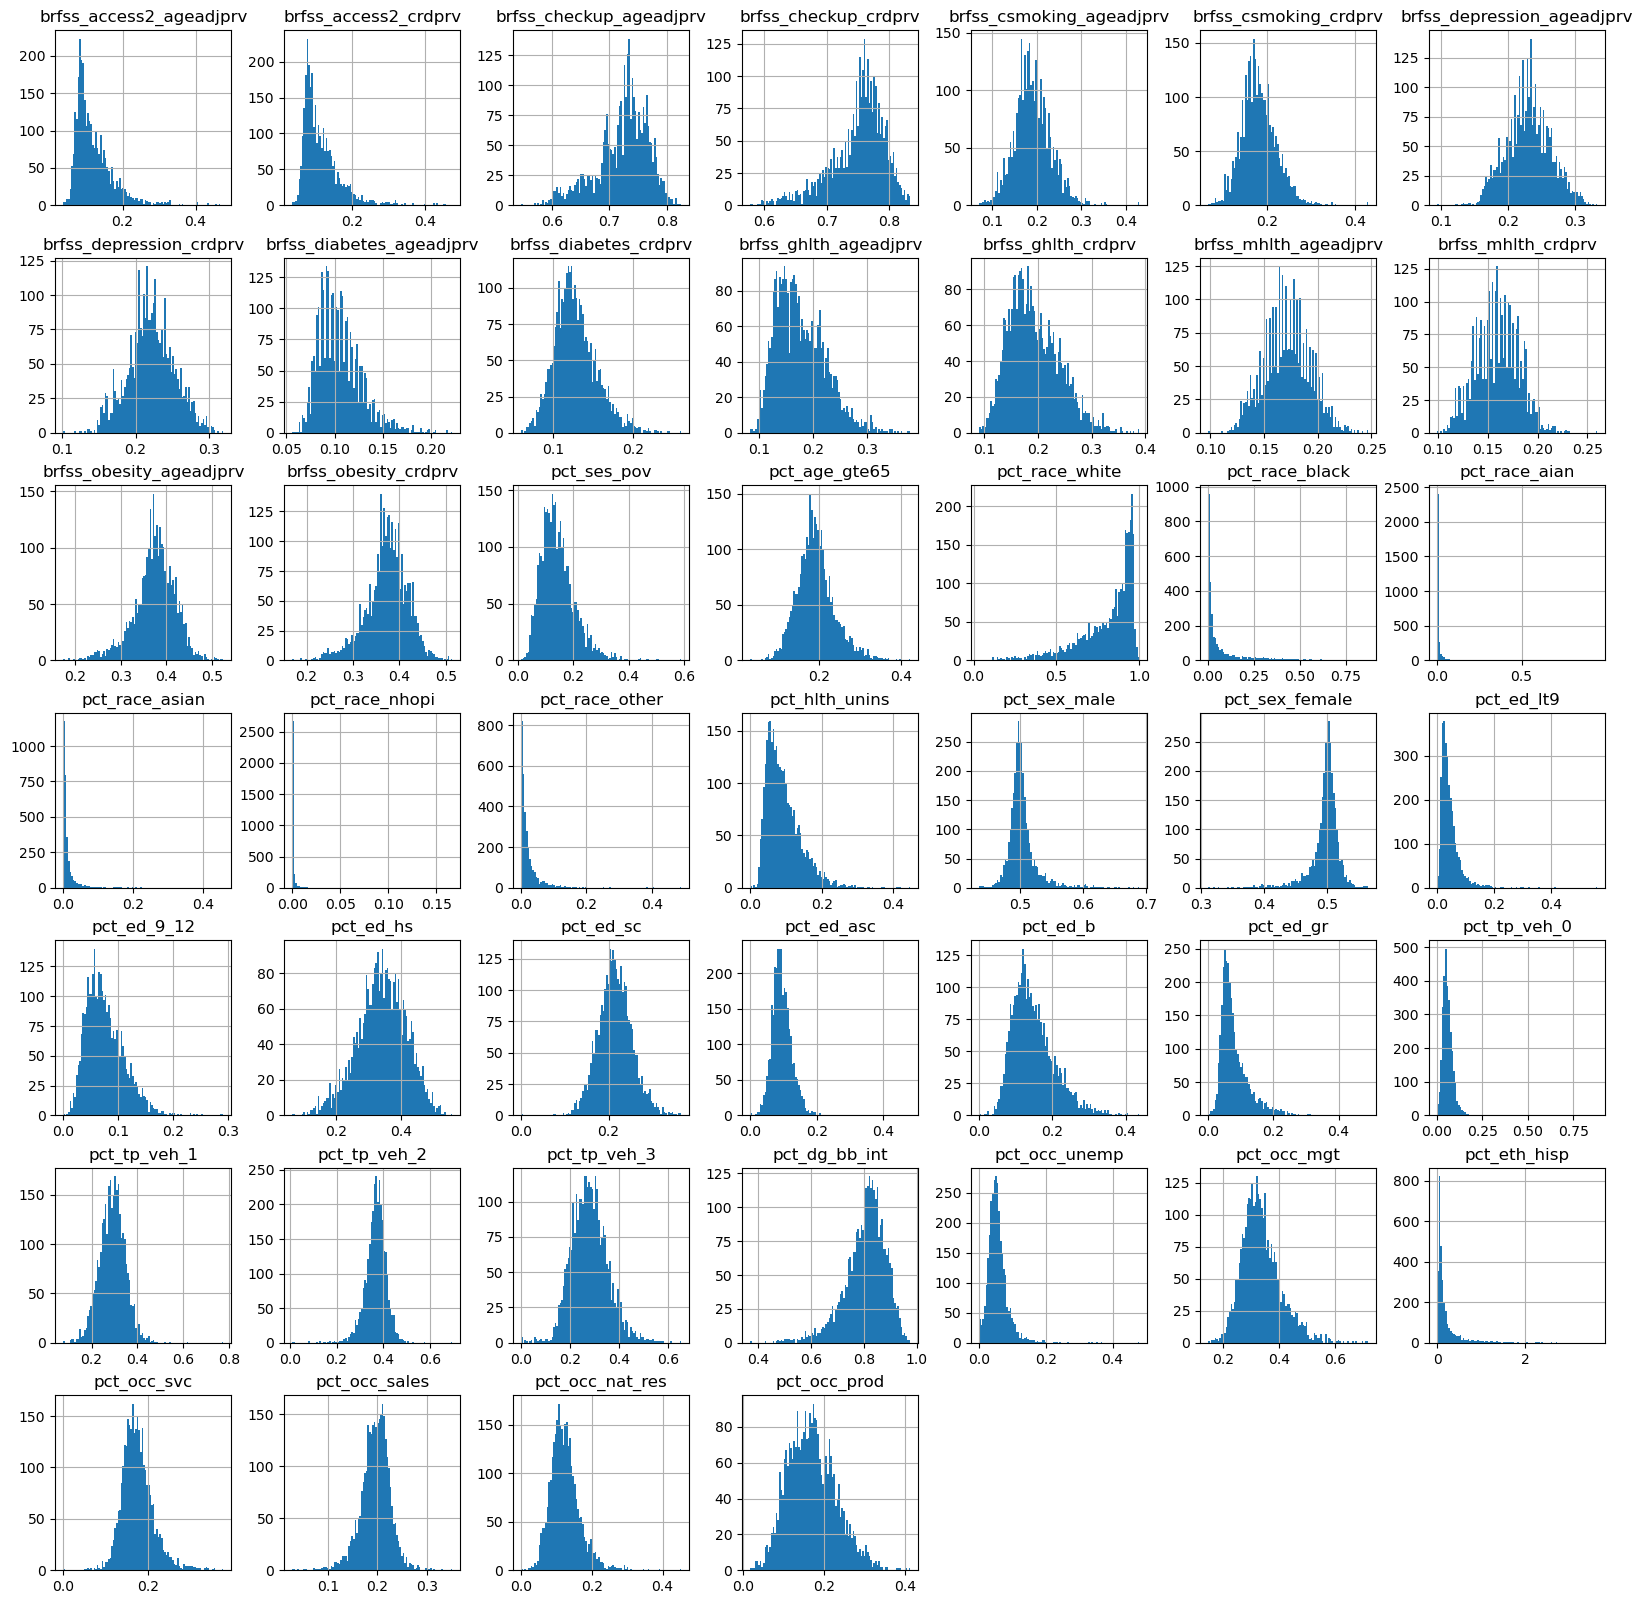

In [96]:
df[features].hist(figsize=(20,20), bins=100)